In [ ]:
!pip install -q datasets flash_attn timm einops bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 45.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have 

In [ ]:
!pip install --upgrade pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [ ]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']
import requests
import copy
%matplotlib inline

In [ ]:
model_id = 'microsoft/Florence-2-large'

## HF Login

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

## Load model

In [ ]:
model = AutoModelForCausalLM.from_pretrained(model_id,
                                             trust_remote_code=True,
                                             device_map='cuda')
print(model)
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

Florence2ForConditionalGeneration(
  (vision_tower): DaViT(
    (convs): ModuleList(
      (0): ConvEmbed(
        (proj): Conv2d(3, 256, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      )
      (1): ConvEmbed(
        (proj): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      )
      (2): ConvEmbed(
        (proj): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      )
      (3): ConvEmbed(
        (proj): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      )
    )
    (blocks): ModuleList(
      (0): MySequential(
        (0): MySequential(
          (spatial_block): SpatialBlock(
            (conv1): PreNorm(
              (fn): De

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
def run_example(task_prompt, image):
    inputs = processor(text=task_prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

In [ ]:
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
local_image_path = "/content/medicalreport.png"

In [ ]:
image = Image.open(local_image_path)

In [ ]:
image = Image.open(local_image_path).convert("RGB") # Add .convert("RGB") to ensure the image is in RGB format

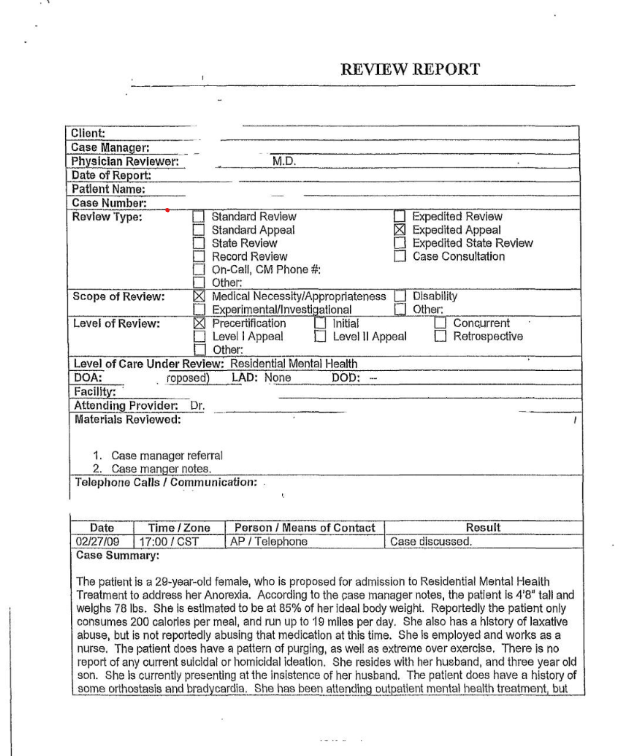

In [ ]:
image

## Caption Task

In [ ]:
task_prompt = '<CAPTION>'
run_example(task_prompt,image)

{'<CAPTION>': "a form for a patient's review report"}

## Detailed Caption

In [ ]:
task_prompt = '<DETAILED_CAPTION>'
run_example(task_prompt, image)

{'<DETAILED_CAPTION>': "The image shows a white paper with a black and white image of a patient's review report template, which is an example of a medical report template in PDF format. The paper is filled with text, providing details about the patient's medical history, diagnosis, treatment, and other relevant information."}

#### To process the location tokens and render them on the image, the following method will be called to plot bounding boxes.

{'<OD>': {'bboxes': [[0.320499986410141, 0.3779999911785126, 640.0384521484375, 754.865966796875]], 'labels': ['poster']}}


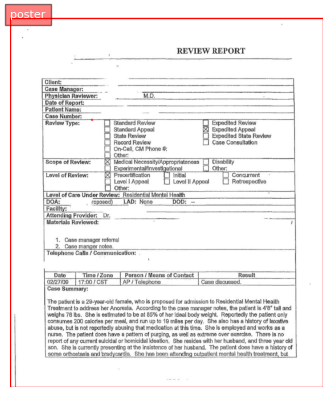

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

task_prompt = '<OD>'
results = run_example(task_prompt,image)
print(results)
plot_bbox(image, results['<OD>'])

## OCR

This function processes Florence-2's output to get the location tokens, used them to draw bounding boxes, and then writes the label corresponding to the bounding boxes, i.e., the text recognized through OCR.

In [ ]:
def draw_ocr_bboxes(image, prediction):
    scale = 1
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",

                    fill=color)
    display(image)

In [ ]:
task_prompt = '<OCR>'
run_example(task_prompt,image)

{'<OCR>': 'REVIEW REPORTClient:Case Manager:Physician Reviewer:M.D.Date of Report:Patient Name:Revlow Type:Standard ReviewExpedited ReviewStandard AppealExpected AppealState ReviewExpected State ReviewRecord ReviewCase ConsultationOn-Call, CM Phone #:Other:Scope of Review:Medical Necessity/AppropriatenessDisabilityMedical/InvestigationalOther:Level I AppealInitialLevel II AppealConcurrentPrecertificationOther:RetrospectiveLevel of Care Under Review: Residential Mental HealthDOA:LAD: NoneDOD:Facility:roposed:Attending Provider: Dr.Materials Reviewed:1. Case manager referralTelephone Calls & Communication:DateTime / ZonePerson / Means of ContactResult02/27/0917:00 / CSTAP / TelephoneCase discussed.Case Summary:The patient is a 29-year-old woman, who is proposed for admission to Residential Mental HeathTreatment to address her Anorexia. According to the case manager, the patient is 48" tall andweighs 78 lbs. She is estimated to be 85% of her ideal body weight. Reportedly the patient onlyc

{'<OCR_WITH_REGION>': {'quad_boxes': [[338.1274719238281, 60.85799789428711, 481.0704650878906, 60.85799789428711, 481.0704650878906, 75.97799682617188, 338.1274719238281, 75.97799682617188], [68.26649475097656, 126.62999725341797, 106.08549499511719, 126.62999725341797, 106.08549499511719, 137.97000122070312, 68.26649475097656, 137.97000122070312], [68.9074935913086, 141.75, 150.3144989013672, 141.75, 150.3144989013672, 153.08999633789062, 68.9074935913086, 153.08999633789062], [68.9074935913086, 154.60198974609375, 179.15948486328125, 154.60198974609375, 179.15948486328125, 166.697998046875, 68.9074935913086, 166.697998046875], [270.1814880371094, 154.60198974609375, 294.53948974609375, 154.60198974609375, 294.53948974609375, 165.94200134277344, 270.1814880371094, 165.94200134277344], [68.9074935913086, 168.96600341796875, 151.59649658203125, 168.96600341796875, 151.59649658203125, 180.30599975585938, 68.9074935913086, 180.30599975585938], [69.54850006103516, 182.57398986816406, 145.

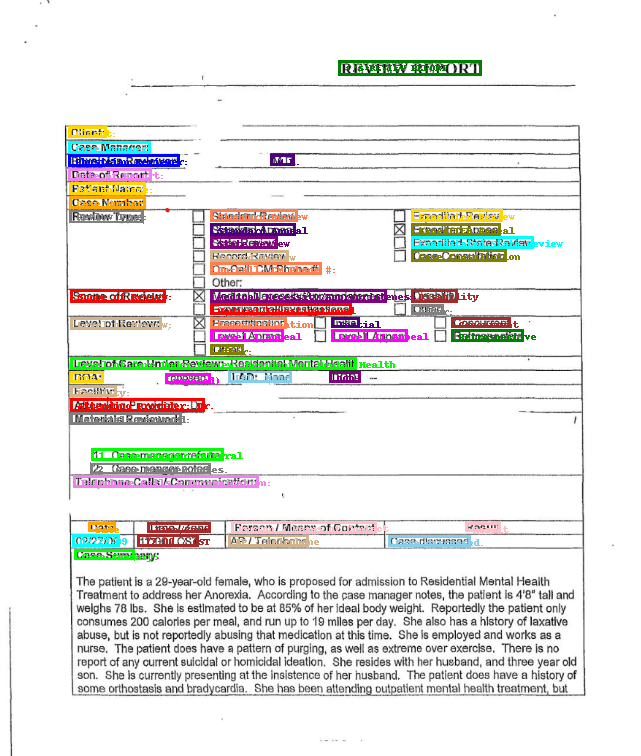

In [ ]:
task_prompt = '<OCR_WITH_REGION>'
results = run_example(task_prompt,image)
print(results)
output_image = copy.deepcopy(image)
draw_ocr_bboxes(output_image, results['<OCR_WITH_REGION>'])

In [ ]:
!jupyter nbconvert --to script /content/microservice.ipynb

[NbConvertApp] Converting notebook /content/microservice.ipynb to script
[NbConvertApp] Writing 3604 bytes to /content/microservice.txt


In [ ]:
from google.colab import files
files.download('/content/microservice.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>